In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digits-recognition/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data=np.array(data)
m,n = data.shape #m=no of rows, n=no of feature+1 [columns]
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0


In [4]:
X_train[:, 0].shape

(784,)

In [5]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01  # 128 hidden neurons
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z)  # prevent overflow
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.01, iterations=2000)


Iteration:  0
[8 4 4 ... 5 7 1] [3 4 5 ... 3 8 5]
0.12795121951219512
Iteration:  10
[8 4 4 ... 7 7 1] [3 4 5 ... 3 8 5]
0.1585609756097561
Iteration:  20
[8 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.1913170731707317
Iteration:  30
[8 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.22997560975609757
Iteration:  40
[3 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.27326829268292685
Iteration:  50
[3 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.3192439024390244
Iteration:  60
[3 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.3633170731707317
Iteration:  70
[3 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.4059756097560976
Iteration:  80
[3 4 4 ... 3 7 1] [3 4 5 ... 3 8 5]
0.4460731707317073
Iteration:  90
[3 4 3 ... 3 7 1] [3 4 5 ... 3 8 5]
0.48241463414634145
Iteration:  100
[3 4 3 ... 3 7 1] [3 4 5 ... 3 8 5]
0.5149756097560976
Iteration:  110
[3 4 0 ... 3 7 1] [3 4 5 ... 3 8 5]
0.5418048780487805
Iteration:  120
[3 4 0 ... 3 7 1] [3 4 5 ... 3 8 5]
0.5650731707317073
Iteration:  130
[3 4 0 ... 3 7 1] [3 4 5 ... 3 8 5]
0.5840731707317073
Iteration:  1

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 2 1 1 7 1 7 8 9 2 2 2 1 7 3 4 3 7 3 4 4 1 7 2 7 6 9 0 7 6 9 5 3 2 2 7 7
 2 7 8 7 9 0 5 6 0 2 8 5 9 5 5 6 9 3 3 4 2 5 8 0 1 4 8 6 6 9 7 9 7 8 9 5 8
 8 7 5 3 0 6 0 7 5 1 9 4 6 7 1 0 7 3 8 7 7 9 6 6 5 5 3 7 2 6 2 9 0 7 1 3 4
 2 5 1 3 7 8 1 0 9 7 9 7 0 1 4 7 0 0 3 5 2 3 8 6 8 3 5 3 0 2 0 2 1 4 7 1 8
 8 1 2 8 8 8 7 2 9 5 2 9 0 5 5 3 6 1 0 0 2 0 0 5 3 1 2 7 7 0 7 1 3 5 1 1 1
 9 1 5 1 7 5 1 9 1 1 3 4 3 5 4 5 7 9 2 9 9 9 6 7 8 7 4 3 4 3 8 5 5 7 4 0 3
 2 8 9 7 5 9 8 1 5 1 5 5 0 1 9 7 5 7 7 4 9 6 1 6 5 3 5 5 2 9 7 4 2 8 5 3 3
 7 1 9 6 3 6 7 1 1 7 3 9 9 4 7 1 9 9 1 7 9 4 8 6 0 0 9 6 3 0 4 6 9 6 9 5 0
 6 7 8 1 4 2 4 1 1 7 9 3 6 3 1 7 1 7 2 1 1 1 6 9 7 1 9 7 4 1 1 2 2 4 1 7 8
 4 8 7 3 7 9 4 1 2 5 1 6 9 6 3 7 7 3 8 0 0 6 3 7 6 8 1 7 2 4 0 5 2 2 9 0 0
 1 5 2 2 9 0 0 1 3 3 2 6 1 8 1 6 4 9 1 6 0 8 6 6 7 4 1 4 7 2 3 6 5 1 7 7 3
 5 8 4 5 9 9 9 3 6 7 3 1 8 6 6 4 0 2 2 1 3 5 6 3 8 9 3 5 6 0 1 7 1 5 4 8 6
 4 7 0 3 4 1 6 3 4 3 8 3 8 9 8 7 7 8 0 1 0 5 6 4 8 8 7 5 9 3 5 1 9 5 3 7 6
 3 1 1 0 8 9 3 0 6 8 3 0 

0.864

Prediction:  [0]
Label:  0


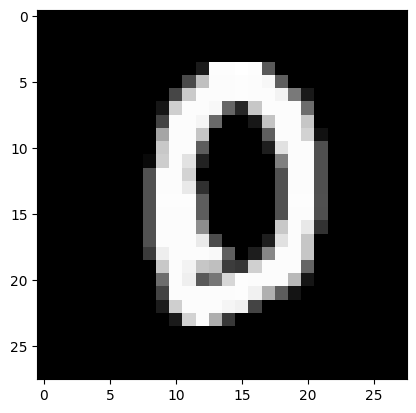

In [10]:
test_prediction(220,W1,b1,W2,b2)